<a href="https://colab.research.google.com/github/ShirleyS911/ANAL590/blob/master/590_HW3_ss4296.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Autoencoder

In [2]:
import keras
import tensorflow as tf
from keras import layers
from keras.datasets import cifar10
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, UpSampling2D, BatchNormalization, MaxPool2D, SimpleRNN, Embedding, Dense, LSTM, Conv1D, Dropout, GlobalMaxPooling1D
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [5]:
print(x_train.shape)

(50000, 32, 32, 3)


In [11]:
input_img = keras.Input(shape=(32,32,3))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 8)           584       
_________________________________________________________________
up_sampling2d_6 (UpSampling2 (None, 16, 16, 8)        

In [13]:
autoencoder.fit(x_train, x_train, epochs=20, batch_size=1024, validation_data=(x_test, x_test))

Epoch 1/20
49/49 [==============================] - 2s 45ms/step - loss: 0.5668 - val_loss: 0.5675
Epoch 2/20
49/49 [==============================] - 2s 43ms/step - loss: 0.5665 - val_loss: 0.5674
Epoch 3/20
49/49 [==============================] - 2s 43ms/step - loss: 0.5665 - val_loss: 0.5673
Epoch 4/20
49/49 [==============================] - 2s 44ms/step - loss: 0.5662 - val_loss: 0.5670
Epoch 5/20
49/49 [==============================] - 2s 44ms/step - loss: 0.5661 - val_loss: 0.5668
Epoch 6/20
49/49 [==============================] - 2s 44ms/step - loss: 0.5660 - val_loss: 0.5669
Epoch 7/20
49/49 [==============================] - 2s 44ms/step - loss: 0.5658 - val_loss: 0.5665
Epoch 8/20
49/49 [==============================] - 2s 44ms/step - loss: 0.5656 - val_loss: 0.5667
Epoch 9/20
49/49 [==============================] - 2s 44ms/step - loss: 0.5655 - val_loss: 0.5664
Epoch 10/20
49/49 [==============================] - 2s 44ms/step - loss: 0.5654 - val_loss: 0.5661
Epoch 11/

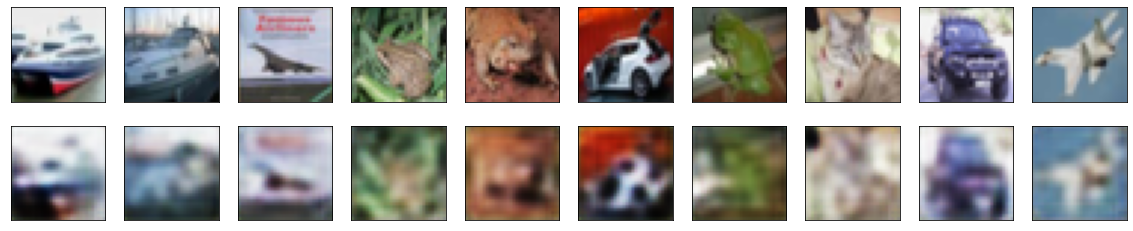

In [14]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2. Image Classification

### Deep CNN

In [35]:
x_train.shape

(50000, 32, 32, 3)

In [36]:
x_test.shape

(10000, 32, 32, 3)

In [37]:
y_train1 = y_train.reshape(-1,)
y_test1 = y_test.reshape(-1,)

In [38]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

TypeError: ignored

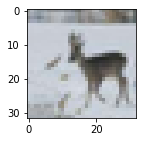

In [43]:
#images.shape

NameError: ignored

In [51]:
model = Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size=(2,2), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters = 16, kernel_size=(2,2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 31, 31, 32)        416       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 14, 14, 16)        2064      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [52]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

results = model.fit(x_train, y_train1, batch_size=32, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6194 - accuracy: 0.4138
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3110 - accuracy: 0.5311
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2033 - accuracy: 0.5720
Epoch 4/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.1365 - accuracy: 0.6004
Epoch 5/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.0919 - accuracy: 0.6162
Epoch 6/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.0530 - accuracy: 0.6319
Epoch 7/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.0248 - accuracy: 0.6417
Epoch 8/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.0026 - accuracy: 0.6510
Epoch 9/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.9817 - accuracy: 0.6569
Epoch 10/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.963

Text(0.5, 1.0, 'Loss on training set')

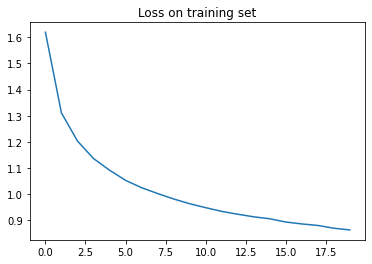

In [53]:
plt.plot(results.history["loss"])
plt.title("Loss on training set")

Text(0.5, 1.0, 'Accuracy on training set')

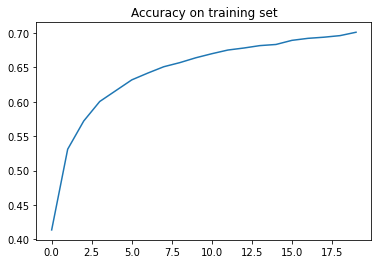

In [54]:
plt.plot(results.history['accuracy'])
plt.title("Accuracy on training set")

In [55]:
model.evaluate(x_test, y_test1)

313/313 [==============================] - 1s 2ms/step - loss: 1.0144 - accuracy: 0.6521


[1.0143769979476929, 0.6521000266075134]

### 2.2 Transfer learning

In [59]:
from tensorflow.keras.applications import ResNet50

In [58]:
y_train2 = keras.utils.to_categorical(y_train, 10)
y_test2 = keras.utils.to_categorical(y_test, 10)

In [63]:
a = ResNet50(input_shape=(32,32,3), weights = 'imagenet', include_top=False)

model2 = Sequential()

model2.add(a)

model2.add(tf.keras.layers.GlobalAveragePooling2D())


model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [64]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                20490     
Total params: 23,608,202
Trainable params: 23,555,082
Non-trainable params: 53,120
_________________________________________________________________


In [67]:
model2.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)


results2 = model2.fit(x_train, y_train2, batch_size=1024, epochs=5)

Epoch 1/5
49/49 [==============================] - 22s 439ms/step - loss: 1.9137 - accuracy: 0.3953
Epoch 2/5
49/49 [==============================] - 18s 366ms/step - loss: 1.3037 - accuracy: 0.5416
Epoch 3/5
49/49 [==============================] - 17s 354ms/step - loss: 1.0950 - accuracy: 0.6374
Epoch 4/5
49/49 [==============================] - 17s 353ms/step - loss: 0.8898 - accuracy: 0.6949
Epoch 5/5
49/49 [==============================] - 18s 358ms/step - loss: 0.7162 - accuracy: 0.7464


Text(0.5, 1.0, 'Loss on training set')

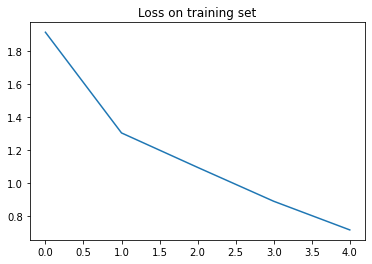

In [70]:
plt.plot(results2.history["loss"])
plt.title("Loss on training set")

Text(0.5, 1.0, 'Accuracy on training set')

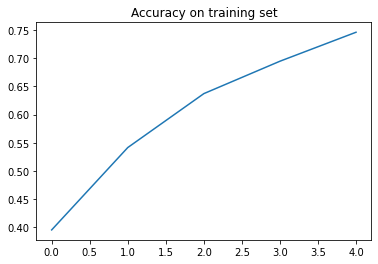

In [71]:
plt.plot(results2.history['accuracy'])
plt.title("Accuracy on training set")

In [72]:
model2.evaluate(x_test, y_test2)

313/313 [==============================] - 3s 10ms/step - loss: 2.6457 - accuracy: 0.2206


[2.6457228660583496, 0.22059999406337738]

## 3. Text Classfication

### RNN

In [73]:
import pandas as pd

In [75]:
spam_df = pd.read_csv('SPAM_detection.csv')

In [ ]:
spam_df

,Message,category_val
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [ ]:
spam_dic = ['HAM', 'SPAM']

In [77]:
texts = []
labels = []

for i, label in enumerate(spam_df['category_val']):
  texts.append(spam_df['Message'][i])
  labels.append(label)

texts = np.asarray(texts)
labels = np.asarray(labels)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.3, random_state=100)

In [79]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
word_index = tokenizer.word_index
padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=100, padding='post', truncating='post')

In [82]:
model31 = Sequential()
model31.add(Embedding(10000, 32))
model31.add(SimpleRNN(32))
model31.add(Dense(1, activation='sigmoid'))

model31.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [83]:
model31.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
results_31 = model31.fit(padded, y_train, epochs=5, batch_size=1024,validation_data=(testing_padded, y_test))

Epoch 1/5
4/4 [==============================] - 0s 115ms/step - loss: 0.8492 - acc: 0.1359 - val_loss: 0.6895 - val_acc: 0.5616
Epoch 2/5
4/4 [==============================] - 0s 70ms/step - loss: 0.6386 - acc: 0.7890 - val_loss: 0.5593 - val_acc: 0.8499
Epoch 3/5
4/4 [==============================] - 0s 67ms/step - loss: 0.5313 - acc: 0.8685 - val_loss: 0.4981 - val_acc: 0.8529
Epoch 4/5
4/4 [==============================] - 0s 76ms/step - loss: 0.4526 - acc: 0.9079 - val_loss: 0.4115 - val_acc: 0.9324
Epoch 5/5
4/4 [==============================] - 0s 71ms/step - loss: 0.3690 - acc: 0.9608 - val_loss: 0.3419 - val_acc: 0.9575


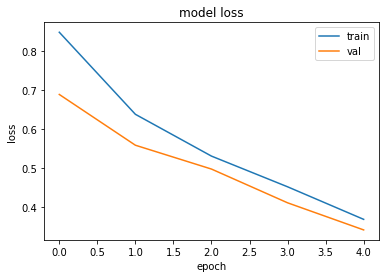

In [84]:
plt.plot(results_31.history['loss'])
plt.plot(results_31.history['val_loss'])
plt.legend(['train', 'val'], loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('model loss')
plt.show()

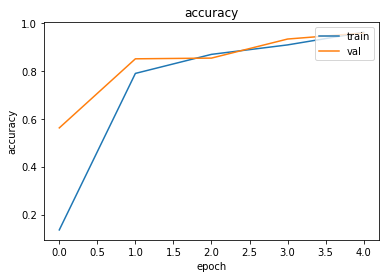

In [85]:
plt.plot(results_31.history['acc'])
plt.plot(results_31.history['val_acc'])
plt.legend(['train', 'val'], loc='upper right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('accuracy')
plt.show()

### CNN

In [86]:
model = Sequential()
model.add(Embedding(input_dim=10000 + 1, output_dim=10, input_length=100))
model.add(Conv1D(32, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))            
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [87]:
results_32 = model.fit(padded, y_train, batch_size=1024, epochs=5, validation_data=(testing_padded, y_test))

Epoch 1/5
4/4 [==============================] - 0s 113ms/step - loss: 0.7126 - accuracy: 0.2567 - val_loss: 0.6960 - val_accuracy: 0.4067
Epoch 2/5
4/4 [==============================] - 0s 12ms/step - loss: 0.6897 - accuracy: 0.5641 - val_loss: 0.6762 - val_accuracy: 0.9031
Epoch 3/5
4/4 [==============================] - 0s 11ms/step - loss: 0.6702 - accuracy: 0.8115 - val_loss: 0.6584 - val_accuracy: 0.8774
Epoch 4/5
4/4 [==============================] - 0s 12ms/step - loss: 0.6525 - accuracy: 0.8777 - val_loss: 0.6425 - val_accuracy: 0.8660
Epoch 5/5
4/4 [==============================] - 0s 13ms/step - loss: 0.6366 - accuracy: 0.8785 - val_loss: 0.6280 - val_accuracy: 0.8660


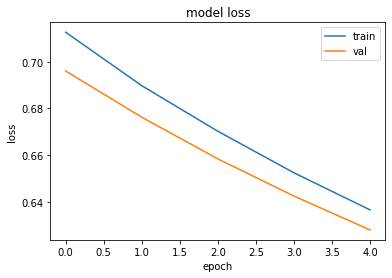

In [88]:
plt.plot(results_32.history['loss'])
plt.plot(results_32.history['val_loss'])
plt.legend(['train', 'val'], loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('model loss')
plt.show()

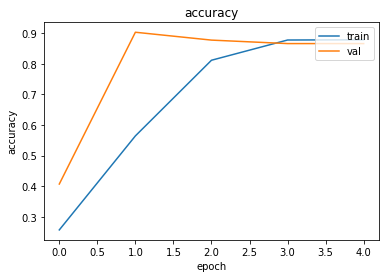

In [89]:
plt.plot(results_32.history['accuracy'])
plt.plot(results_32.history['val_accuracy'])
plt.legend(['train', 'val'], loc='upper right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('accuracy')
plt.show()

### 3.3

In [91]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [92]:
y_pred_rnn = model31.predict(testing_padded).ravel()
fpr_rnn, tpr_rnn, thresholds_rnn = roc_curve(y_test, y_pred_rnn)
auc_rnn = auc(fpr_rnn, tpr_rnn)

In [93]:
y_pred_cnn = model.predict(testing_padded).ravel()
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test, y_pred_cnn)
auc_cnn = auc(fpr_cnn, tpr_cnn)

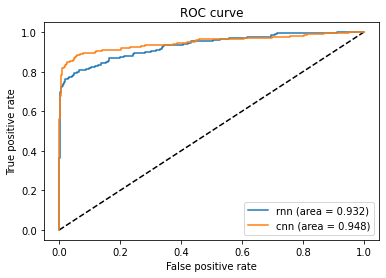

In [94]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rnn, tpr_rnn, label='rnn (area = {:.3f})'.format(auc_rnn))
plt.plot(fpr_cnn, tpr_cnn, label='cnn (area = {:.3f})'.format(auc_cnn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

From the ROC curve, because cnn has larger area than rnn, looks like the cnn model that I built works better than the rnn model I built.